# Installing required libraries and files

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [112]:
df = pd.read_csv('IPL_2023.csv')

# Making initial clearings

In [113]:
# checkpoint
check1 = df.copy()

In [114]:
df =check1.copy()

In [115]:
df.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


In [116]:
df[['Player', 'Team']] = df['Player'].str.split('\n', expand=True)

In [117]:
df['HS'] = df['HS'].str.replace('*', '*1', regex=False)
df[['HS', 'HSNO']] = df['HS'].str.split('*', expand=True)
df['HSNO'].fillna(value=0, inplace=True)
df['HSNO'] = df['HSNO'].astype(bool)
df['HS'] = df['HS'].astype(int)

In [118]:
df['Avg'] = df['Avg'].replace('-', np.nan).astype(float)

In [119]:
df = df[['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS','HSNO', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  163 non-null    object 
 1   Team    163 non-null    object 
 2   Mat     163 non-null    int64  
 3   Inns    163 non-null    int64  
 4   NO      163 non-null    int64  
 5   Runs    163 non-null    int64  
 6   HS      163 non-null    int32  
 7   HSNO    163 non-null    bool   
 8   Avg     143 non-null    float64
 9   BF      163 non-null    int64  
 10  SR      163 non-null    float64
 11  100     163 non-null    int64  
 12  50      163 non-null    int64  
 13  4s      163 non-null    int64  
 14  6s      163 non-null    int64  
dtypes: bool(1), float64(2), int32(1), int64(9), object(2)
memory usage: 17.5+ KB


In [121]:
print("All column names:-\n")
print(df.columns.values.tolist())

All column names:-

['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'HSNO', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']


In [122]:
print(df.shape)
df.head()

(163, 15)


,Player,Team,Mat,Inns,NO,Runs,HS,HSNO,Avg,BF,SR,100,50,4s,6s
0,Faf Du Plessis,RCB,14,14,1,730,84,False,56.15,475,153.68,0,8,60,36
1,Shubman Gill,GT,14,14,2,680,104,True,56.67,446,152.46,2,4,67,22
2,Virat Kohli,RCB,14,14,2,639,101,True,53.25,457,139.82,2,6,65,16
3,Yashasvi Jaiswal,RR,14,14,1,625,124,False,48.08,382,163.61,1,5,82,26
4,Devon Conway,CSK,14,13,2,585,92,True,53.18,422,138.62,0,6,69,16


In [123]:
small=df.columns.values
for col in small:
    print(df.value_counts(col))
    print(' ')

Player
Abdul Basith          1
Ruturaj Gaikwad       1
Prerak Mankad         1
Prithvi Shaw          1
Priyam Garg           1
                     ..
Jagadeesan Narayan    1
Jason Behrendorff     1
Jason Holder          1
Jason Roy             1
Yudhvir Singh         1
Name: count, Length: 163, dtype: int64
 
Team
DC      22
LSG     19
RCB     19
SRH     19
KKR     16
PBKS    16
MI      15
RR      14
GT      12
CSK     11
Name: count, dtype: int64
 
Mat
14    44
2     13
4     12
7     11
3     10
10    10
13    10
8      9
9      9
11     9
6      8
1      6
5      6
12     6
Name: count, dtype: int64
 
Inns
2     27
1     21
14    21
3     13
9     12
4     11
6     11
13    11
10     9
11     9
7      5
8      5
5      4
12     4
Name: count, dtype: int64
 
NO
0    50
1    46
2    34
3    16
4     8
6     4
5     2
8     2
7     1
Name: count, dtype: int64
 
Runs
1      12
2       5
16      4
3       3
4       3
       ..
110     1
106     1
105     1
103     1
730     1
Name: coun

In [124]:
check2 = df.copy()

In [125]:
df =check2.copy()

## Dealing with null values

In [126]:
df.isnull().sum()

Player     0
Team       0
Mat        0
Inns       0
NO         0
Runs       0
HS         0
HSNO       0
Avg       20
BF         0
SR         0
100        0
50         0
4s         0
6s         0
dtype: int64

### Replacing null AVG values with Runs/innings

In [127]:
df[(df['Avg'].isnull())]

,Player,Team,Mat,Inns,NO,Runs,HS,HSNO,Avg,BF,SR,100,50,4s,6s
96,David Willey,RCB,4,3,3,35,20,True,NaN,32,109.37,0,0,4,0
108,Mayank Markande,SRH,10,3,3,21,18,True,NaN,13,161.53,0,0,2,1
117,Akeal Hosein,SRH,1,1,1,16,16,True,NaN,10,160.00,0,0,1,1
126,Kedar Jadhav,RCB,2,1,1,12,12,True,NaN,10,120.00,0,0,1,0
136,Mukesh Kumar,DC,10,3,3,7,6,True,NaN,9,77.77,0,0,0,0
138,Alzarri Joseph,GT,7,2,2,7,7,True,NaN,12,58.33,0,0,1,0
141,Jofra Archer,MI,5,2,2,4,3,True,NaN,4,100.00,0,0,0,0
143,Vaibhav Arora,KKR,5,2,2,3,2,True,NaN,2,150.00,0,0,0,0
144,Jason Behrendorff,MI,10,1,1,3,3,True,NaN,4,75.00,0,0,0,0
146,Arshdeep Singh,PBKS,14,2,2,2,2,True,NaN,2,100.00,0,0,0,0


In [128]:
null_values = df['Avg'].isnull()
df.loc[null_values, 'Avg'] = df.loc[null_values, 'Runs'] / df.loc[null_values, 'Inns']

In [129]:
check3 = df.copy()

In [130]:
df =check3.copy()

# Correlations

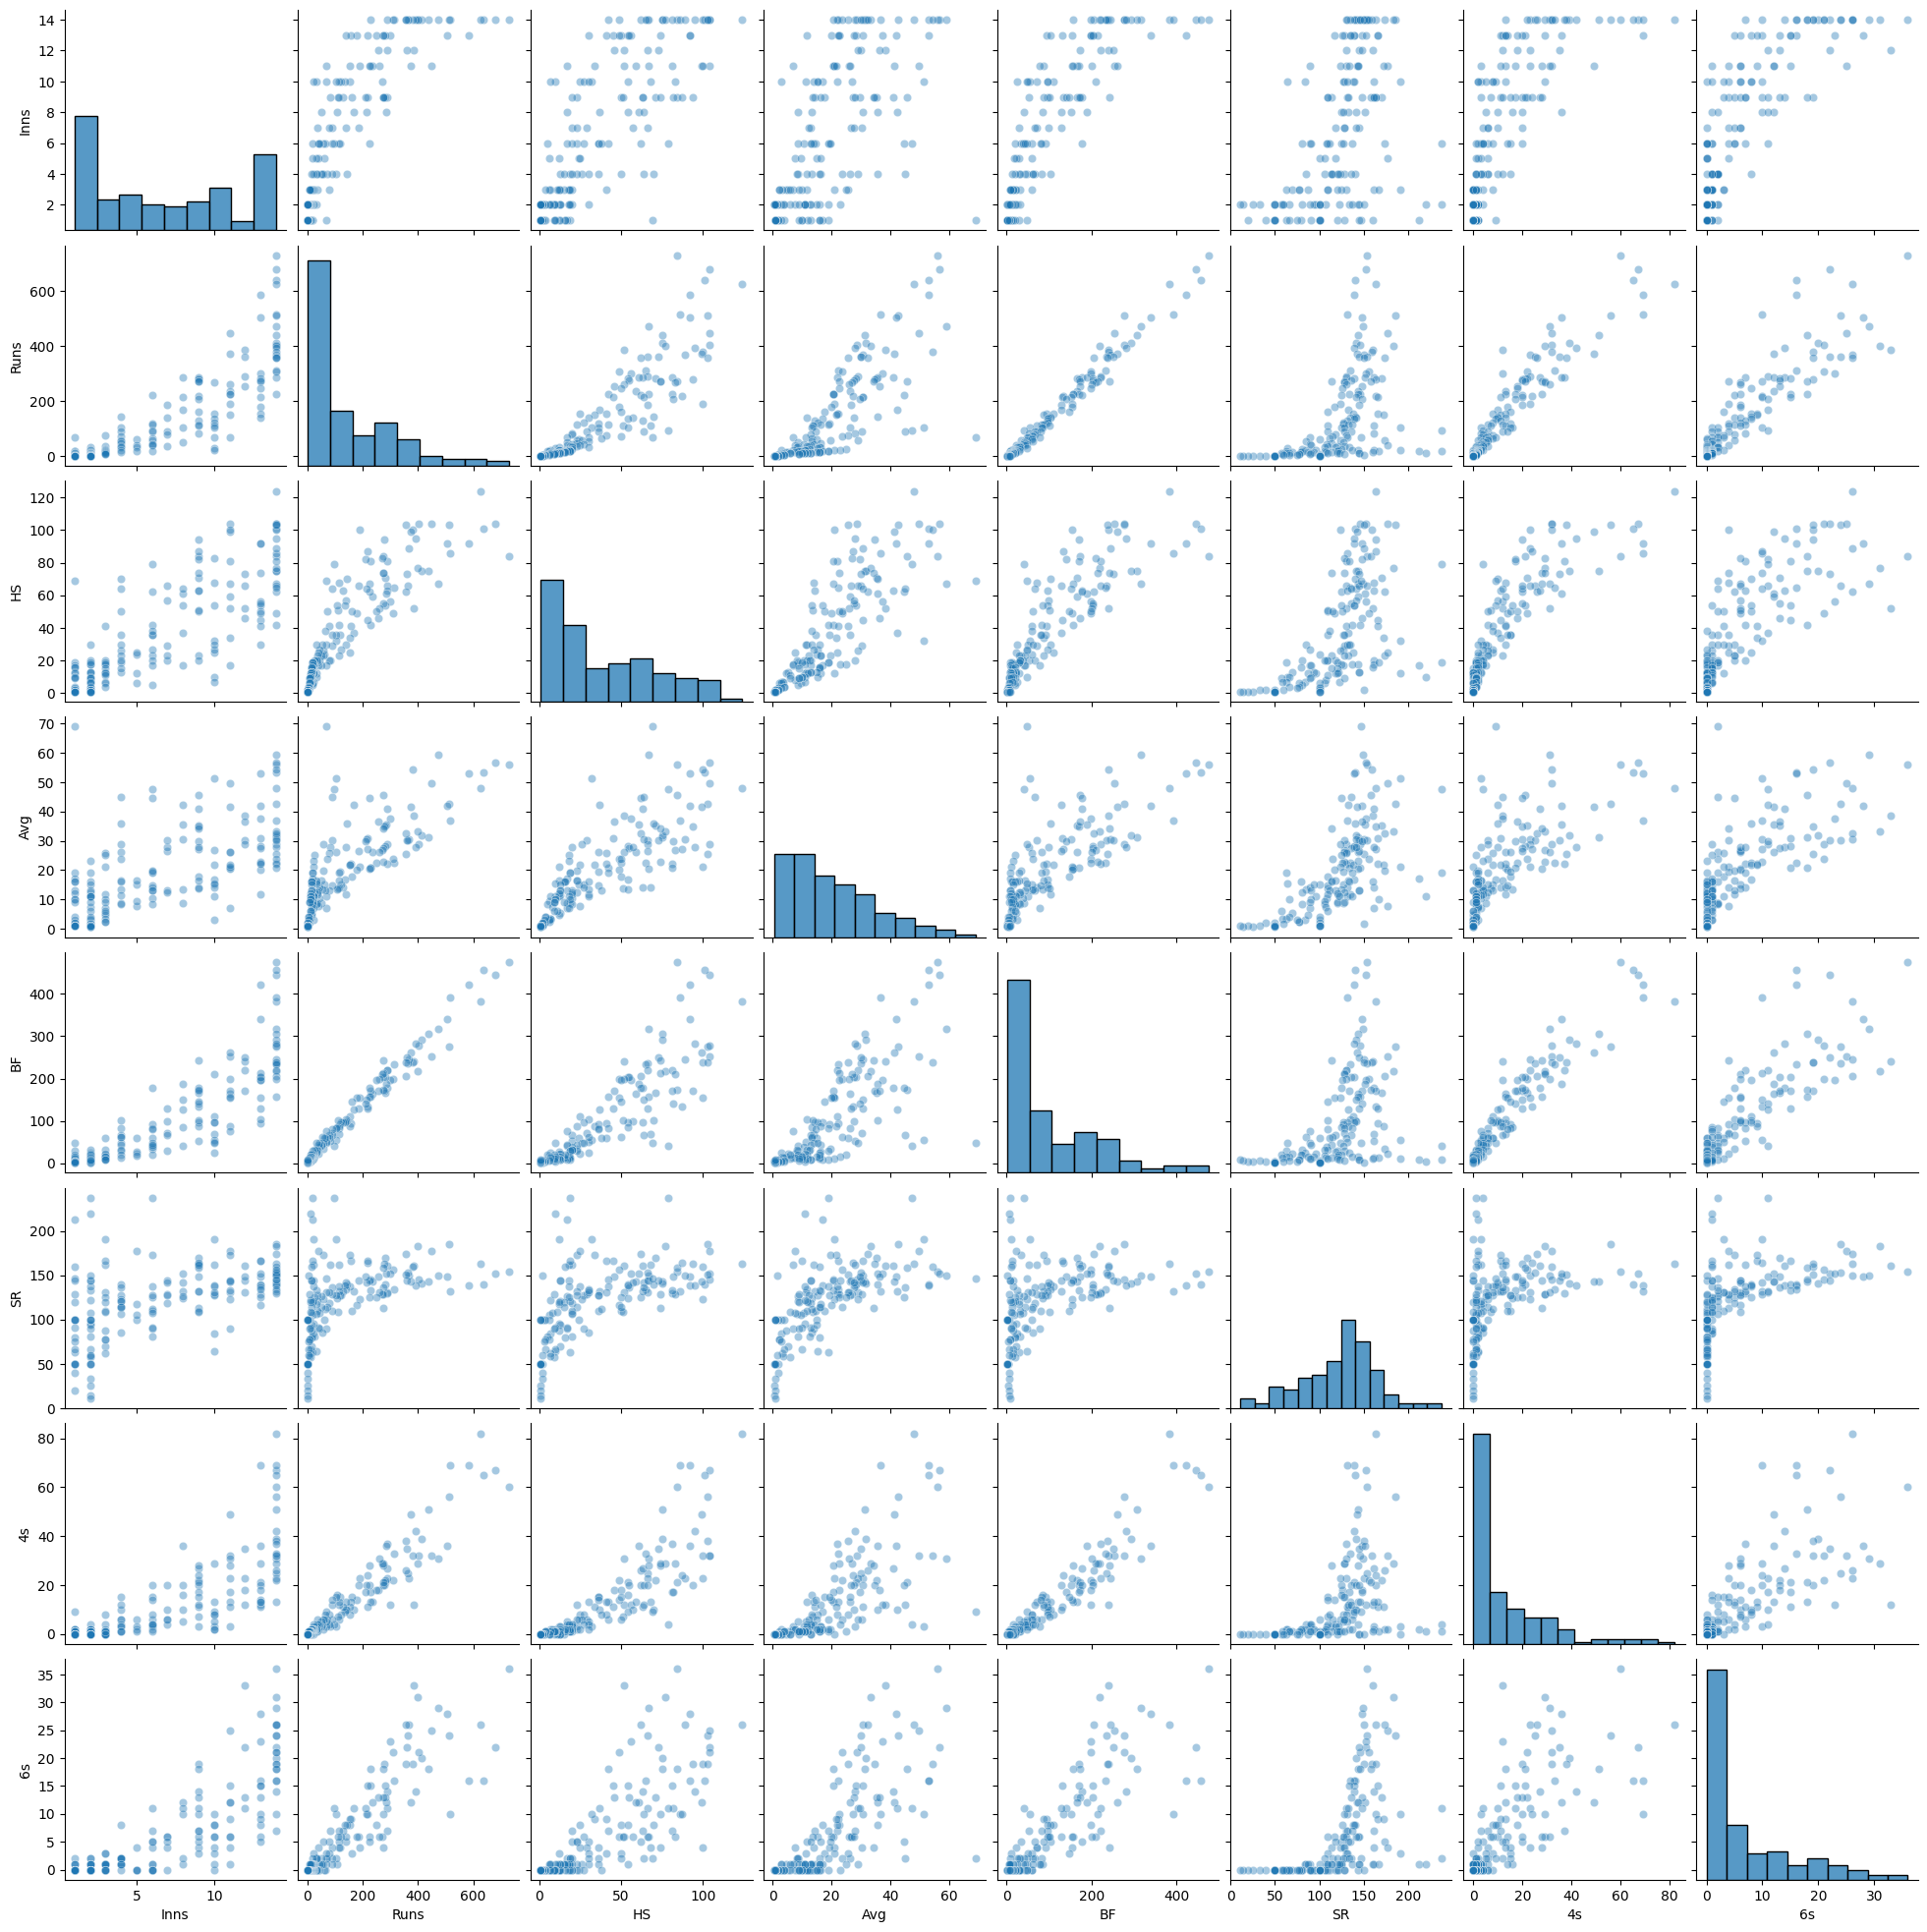

In [131]:
sns.pairplot(df[['Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR','4s', '6s']], kind='scatter', plot_kws={'alpha':0.4})

We can jointplot to analyse more but we will not be doing that for the scope of this analysis.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

In [133]:
x=df[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'HSNO', 'Avg', 'BF', 'SR', '100', '50', '6s']]
y=df['4s']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)

0.9480215657370652

In [134]:
leepred = lmodel.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 9.89824392776659


In [137]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
lmodel = LogisticRegression()

In [138]:
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 37.46938775510204


In [139]:
from sklearn.tree import DecisionTreeRegressor
lmodel = DecisionTreeRegressor()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 24.408163265306122


In [140]:
from sklearn.ensemble import RandomForestRegressor
lmodel = RandomForestRegressor()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 30.106489795918364


In [141]:
from sklearn.svm import SVR
lmodel = SVR()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 53.63039394684738


In [142]:
lmodel = Ridge()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 10.117936243579692


In [143]:
lmodel = Lasso()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 10.836273989859125


In [144]:
lmodel = ElasticNet()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 10.724007562542107


In [145]:
lmodel = BayesianRidge()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 10.631482162094139


In [146]:
lmodel = HuberRegressor()
lmodel.fit(x_train, y_train)
lmodel.score(x_test, y_test)
leepred = lmodel.predict(x_test)
print("Mean squared error:", mean_squared_error(y_test,leepred))

Mean squared error: 10.779185073027863


We can see that least MSE is achieved by Linear Regression at MSE=9.89824392776659.